<a href="https://colab.research.google.com/github/VamsiKrishna-05/Banky/blob/main/WRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WATER RESOURCE MANAGEMENT FLOOD DETECTION

In [2]:
import os
import numpy as np
import tensorflow as tf
import kagglehub
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# -------------------------------
# Step 1: Download dataset via KaggleHub
# -------------------------------
path = kagglehub.dataset_download("rahultp97/louisiana-flood-2016")
print("Path to dataset files:", path)

# In that dataset, you will see folders like:
#   /train/
#   /test/

TRAIN_DIR = os.path.join(path, "train")
TEST_DIR = os.path.join(path, "test")

# -------------------------------
# Step 2: Helper - Load dataset
# -------------------------------
IMG_SIZE = (128, 128)

def load_dataset(folder):
    images, labels = [], []
    for fname in os.listdir(folder):
        if fname.endswith((".png", ".jpg", ".jpeg")):
            fpath = os.path.join(folder, fname)
            img = load_img(fpath, target_size=IMG_SIZE)
            img = img_to_array(img) / 255.0

            # label: _1 → flooded (1), else non-flooded (0)
            label = 1 if "_1" in fname else 0

            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

X_train, y_train = load_dataset(TRAIN_DIR)
X_test, y_test = load_dataset(TEST_DIR)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

# -------------------------------
# Step 3: CNN Model
# -------------------------------
def build_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")   # binary classification
    ])
    return model

model = build_model((IMG_SIZE[0], IMG_SIZE[1], 3))
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# -------------------------------
# Step 4: Training
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

# -------------------------------
# Step 5: Evaluation
# -------------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


100%|██████████| 91.6M/91.6M [00:00<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rahultp97/louisiana-flood-2016/versions/4
Train: (270, 128, 128, 3) (270,)
Test: (52, 128, 128, 3) (52,)
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 566ms/step - accuracy: 0.6583 - loss: 0.7653 - val_accuracy: 0.6923 - val_loss: 0.5842
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 539ms/step - accuracy: 0.6653 - loss: 0.5716 - val_accuracy: 0.7500 - val_loss: 0.4467
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 602ms/step - accuracy: 0.7751 - loss: 0.4590 - val_accuracy: 0.7692 - val_loss: 0.4448
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - accuracy: 0.8091 - loss: 0.3848 - val_accuracy: 0.7500 - val_loss: 0.4012
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.8615 - loss: 0.3254 - val_accuracy: 0.7692 - val_loss: 0.5479
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.8685 - loss: 0.2894 - val_accuracy: 0.6923 - val_loss: 0.6137
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 535ms/step - accuracy: 0.7795 - loss: 0.44

# Series-**1**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


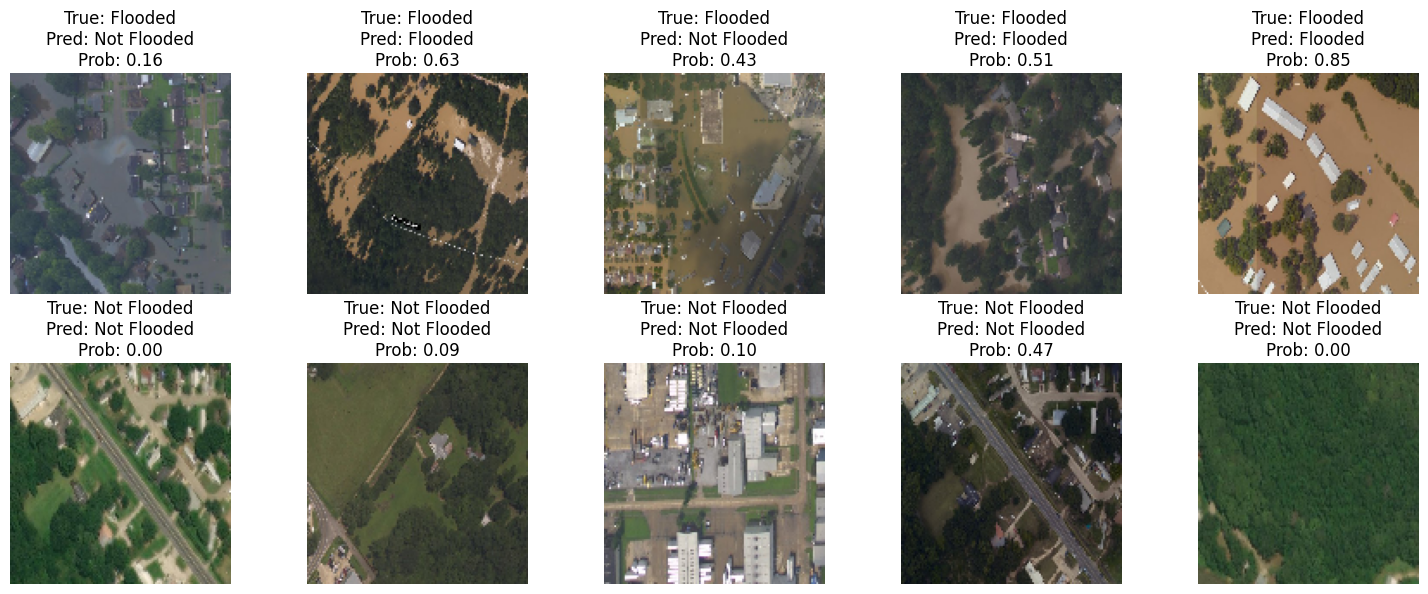

In [3]:
import matplotlib.pyplot as plt
import random

# -------------------------------
# Step 6: Show 5 flooded vs 5 non-flooded images
# -------------------------------
def show_flood_vs_normal(model, test_dir, img_size=(128,128), num_samples=5):
    flooded_files = [f for f in os.listdir(test_dir) if f.endswith((".png", ".jpg")) and "_1" in f]
    normal_files  = [f for f in os.listdir(test_dir) if f.endswith((".png", ".jpg")) and "_1" not in f]

    flooded_sample = random.sample(flooded_files, min(num_samples, len(flooded_files)))
    normal_sample  = random.sample(normal_files, min(num_samples, len(normal_files)))

    selected_files = flooded_sample + normal_sample

    plt.figure(figsize=(15, 6))

    for i, fname in enumerate(selected_files):
        fpath = os.path.join(test_dir, fname)
        img = load_img(fpath, target_size=img_size)
        img_arr = img_to_array(img) / 255.0

        pred_prob = model.predict(img_arr[np.newaxis, ...])[0][0]
        pred_label = "Flooded" if pred_prob > 0.5 else "Not Flooded"
        true_label = "Flooded" if "_1" in fname else "Not Flooded"

        plt.subplot(2, num_samples, i + 1)
        plt.imshow(img_arr)
        plt.axis("off")
        plt.title(f"True: {true_label}\nPred: {pred_label}\nProb: {pred_prob:.2f}")

    plt.tight_layout()
    plt.show()


# Call the function
show_flood_vs_normal(model, TEST_DIR, img_size=IMG_SIZE, num_samples=5)


✅ Libraries loaded successfully!
📥 Downloading dataset...
📁 Dataset ready: /root/.cache/kagglehub/datasets/rahultp97/louisiana-flood-2016/versions/4
🎯 STARTING SIMPLE FLOOD HOUSE DETECTION
🚀 Starting Simple Analysis of 8 images...
📸 Processing 1/8: 5006.png
🔍 Analyzing: 5006.png ((360, 512, 3))
   ✅ Found 0 houses, 0 affected (0.12s)
📸 Processing 2/8: 13008_1.png
🔍 Analyzing: 13008_1.png ((360, 512, 3))
   ✅ Found 2 houses, 0 affected (0.02s)
📸 Processing 3/8: 7012_0.png
🔍 Analyzing: 7012_0.png ((360, 512, 3))
   ✅ Found 10 houses, 2 affected (0.03s)
📸 Processing 4/8: 12003.png
🔍 Analyzing: 12003.png ((360, 512, 3))
   ✅ Found 0 houses, 0 affected (0.01s)
📸 Processing 5/8: 7012.png
🔍 Analyzing: 7012.png ((360, 512, 3))
   ✅ Found 0 houses, 0 affected (0.01s)
📸 Processing 6/8: 6003.png
🔍 Analyzing: 6003.png ((360, 512, 3))
   ✅ Found 0 houses, 0 affected (0.02s)
📸 Processing 7/8: 15007_0.png
🔍 Analyzing: 15007_0.png ((360, 512, 3))
   ✅ Found 11 houses, 4 affected (0.03s)
📸 Processing 8

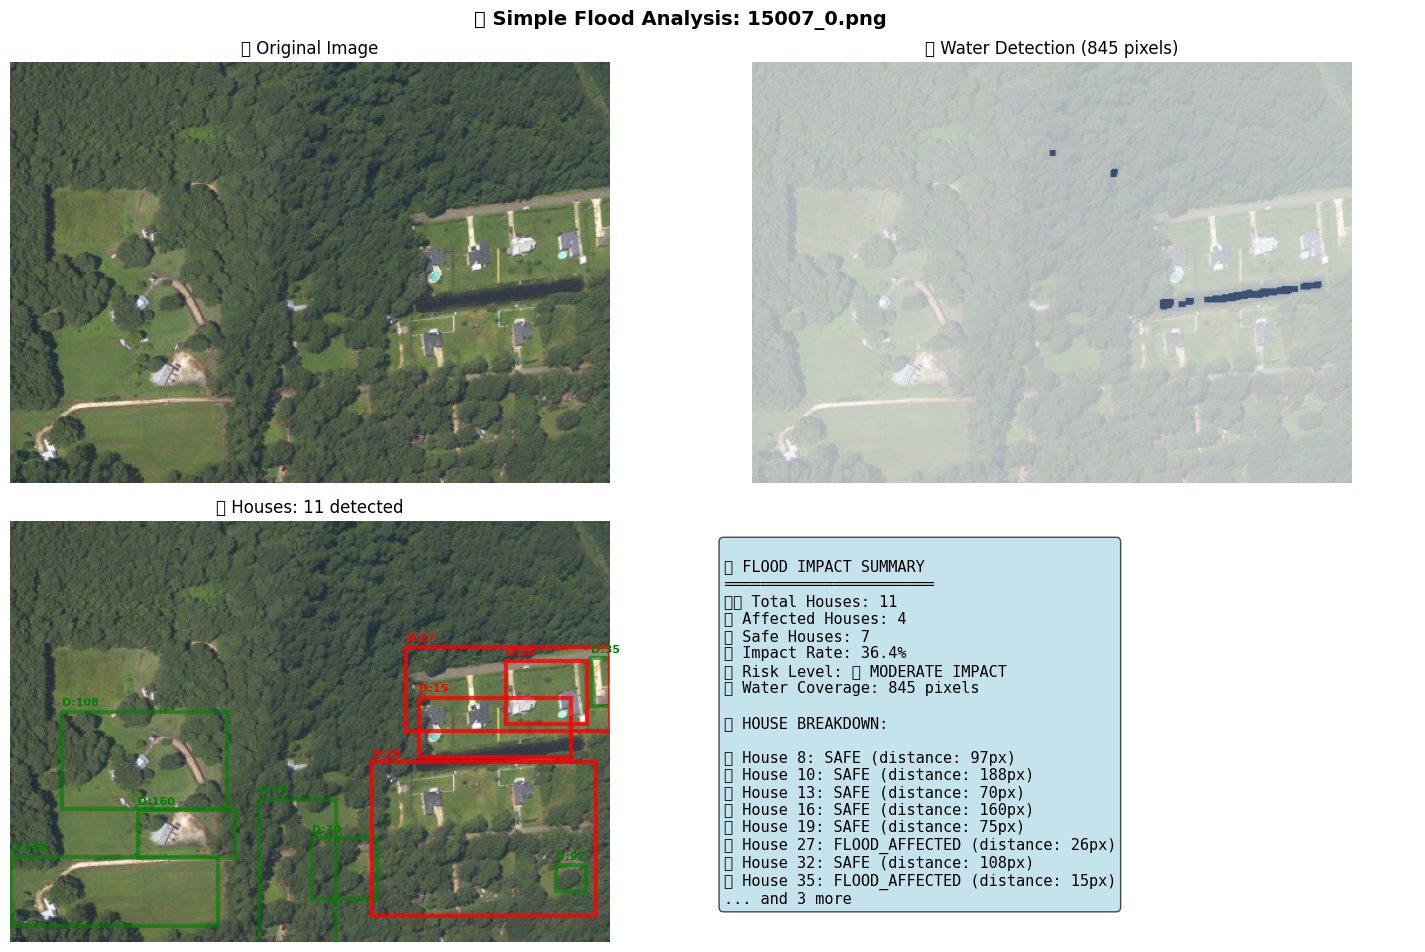


📊 Detailed Analysis 2:


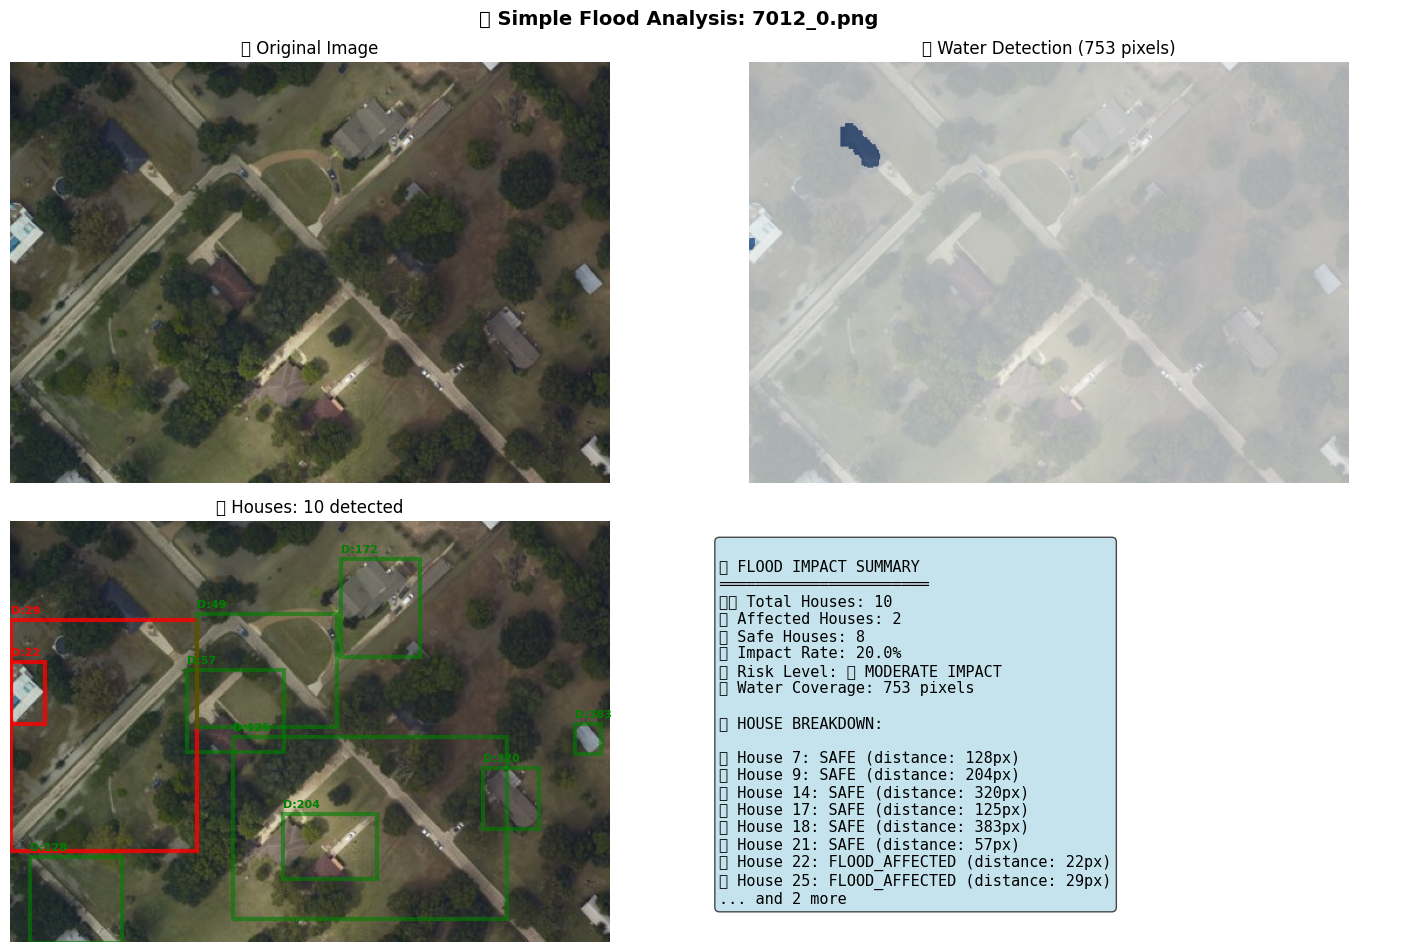


📊 Detailed Analysis 3:


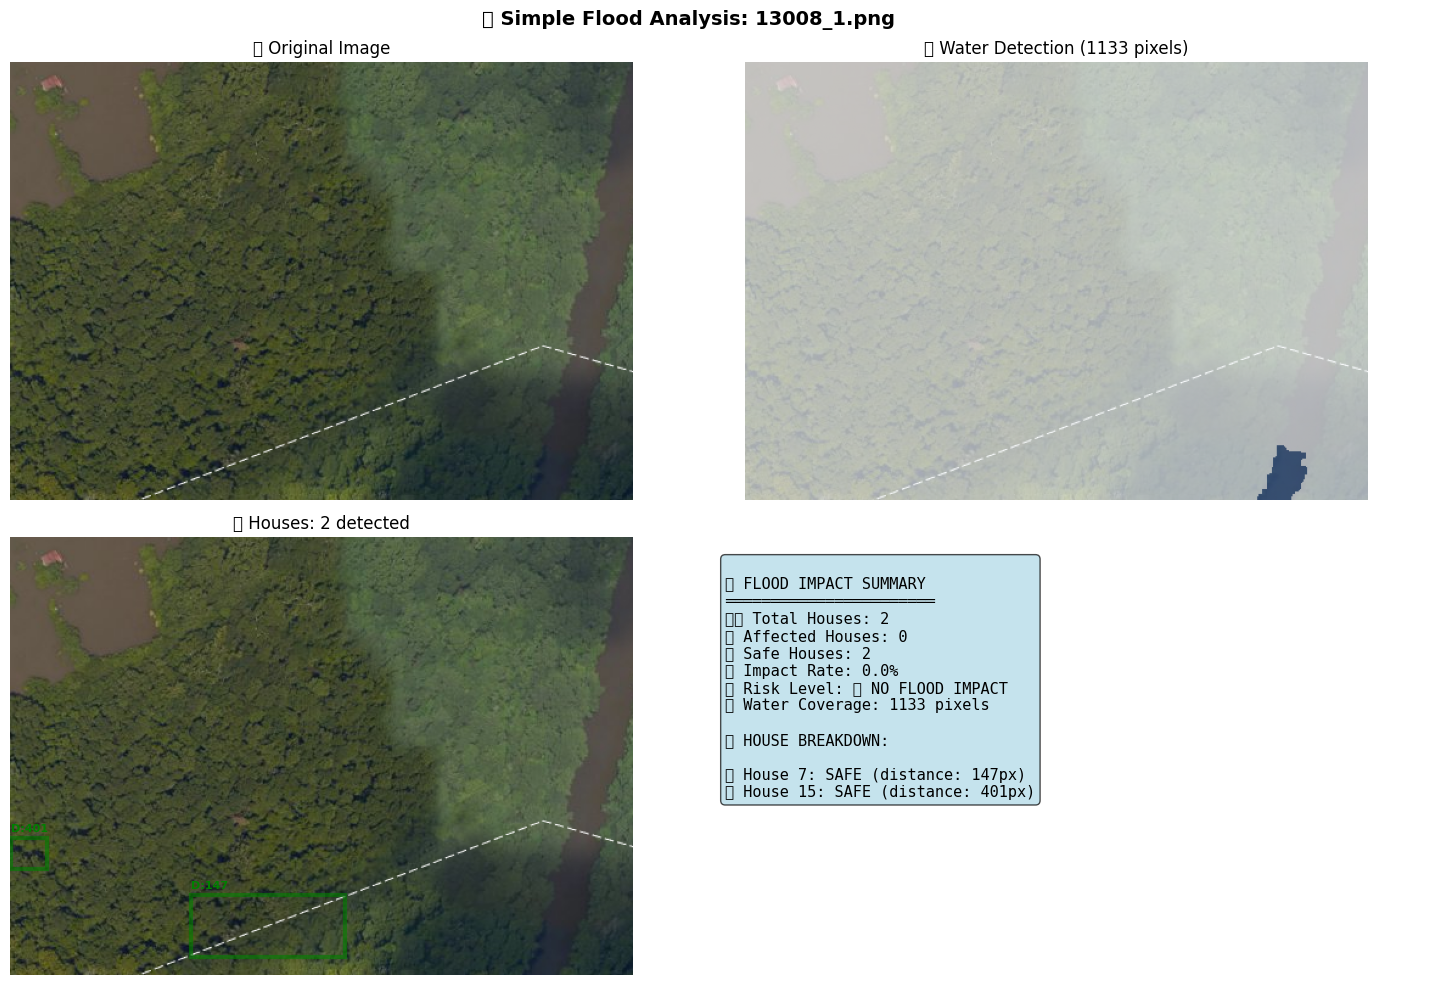

📄 Results exported to: simple_flood_analysis.csv

📋 SUMMARY TABLE:
 image_name  total_houses  affected_houses  safe_houses  impact_percentage  water_area_pixels risk_level
   5006.png             0                0            0           0.000000                  0     IMPACT
13008_1.png             2                0            2           0.000000               1133     IMPACT
 7012_0.png            10                2            8          20.000000                753     IMPACT
  12003.png             0                0            0           0.000000                  0     IMPACT
   7012.png             0                0            0           0.000000                  0     IMPACT
   6003.png             0                0            0           0.000000                  0     IMPACT
15007_0.png            11                4            7          36.363636                845     IMPACT
   8002.png             0                0            0           0.000000                  0

In [4]:
# =================================================================
# SIMPLE & FAST FLOOD-AFFECTED HOUSE DETECTION - GOOGLE COLAB
# =================================================================

# -------------------------------
# STEP 1: Install and Import Libraries (Quick Setup)
# -------------------------------
!pip install kagglehub opencv-python scikit-image

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import measure, morphology, filters
import kagglehub
import pandas as pd
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")

# -------------------------------
# STEP 2: Download Dataset (Same as before)
# -------------------------------
print("📥 Downloading dataset...")
path = kagglehub.dataset_download("rahultp97/louisiana-flood-2016")
TRAIN_DIR = os.path.join(path, "train")
TEST_DIR = os.path.join(path, "test")
print(f"📁 Dataset ready: {path}")

# -------------------------------
# STEP 3: Fast Water Detection Function
# -------------------------------
def detect_water_areas(image, method='hsv_blue'):
    """
    Fast water detection using color-based segmentation
    Based on research: https://iwaponline.com/jh/article/25/3/835/94151/
    """
    if method == 'hsv_blue':
        # Convert to HSV for better water detection
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

        # Define blue color range for water (HSV values)
        # Research shows HSV color space increases water detection accuracy to 50%
        lower_blue = np.array([100, 50, 50])   # Lower HSV threshold
        upper_blue = np.array([130, 255, 255]) # Upper HSV threshold

        # Create mask for water areas
        water_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    elif method == 'gray_threshold':
        # Alternative method using grayscale thresholding
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        # Water typically appears darker in flood images
        _, water_mask = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)

    # Clean up the mask (remove noise)
    kernel = np.ones((5,5), np.uint8)
    water_mask = cv2.morphologyEx(water_mask, cv2.MORPH_CLOSE, kernel)
    water_mask = cv2.morphologyEx(water_mask, cv2.MORPH_OPEN, kernel)

    return water_mask

# -------------------------------
# STEP 4: Fast House/Building Detection Function
# -------------------------------
def detect_houses_simple(image):
    """
    Simple house detection using edge detection and contours
    Based on: https://laccei.org/LACCEI2024-CostaRica/papers/Contribution_781_final_a.pdf
    """
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Morphological operations to close gaps and form building shapes
    kernel = np.ones((3,3), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Fill small holes
    filled = morphology.remove_small_holes(closed.astype(bool), area_threshold=100)
    filled = filled.astype(np.uint8) * 255

    # Find contours (potential houses)
    contours, _ = cv2.findContours(filled, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    houses = []
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)

        # Filter by area to get building-sized objects (remove noise and very large areas)
        if 200 <= area <= 8000:
            x, y, w, h = cv2.boundingRect(contour)

            # Additional filters for house-like shapes
            aspect_ratio = float(w) / h if h > 0 else 0
            if 0.3 <= aspect_ratio <= 3.0:  # Reasonable house proportions
                houses.append({
                    'id': i,
                    'contour': contour,
                    'bbox': (x, y, w, h),
                    'area': area,
                    'center': (x + w//2, y + h//2)
                })

    return houses

# -------------------------------
# STEP 5: Proximity Analysis Function
# -------------------------------
def find_houses_near_water(houses, water_mask, max_distance=30):
    """
    Find houses that are close to water areas
    Distance threshold based on pixel proximity
    """
    affected_houses = []

    # Get water pixel coordinates
    water_coords = np.where(water_mask > 0)

    if len(water_coords[0]) == 0:  # No water detected
        return []

    water_points = list(zip(water_coords[1], water_coords[0]))  # (x, y) format

    for house in houses:
        center_x, center_y = house['center']
        x, y, w, h = house['bbox']

        # Check distance from house perimeter to nearest water pixel
        min_distance = float('inf')

        # Sample points along house perimeter
        perimeter_points = [
            (x, y), (x+w, y), (x+w, y+h), (x, y+h),  # Corners
            (x+w//2, y), (x+w//2, y+h),             # Top/bottom centers
            (x, y+h//2), (x+w, y+h//2)              # Left/right centers
        ]

        for px, py in perimeter_points:
            for wx, wy in water_points[::10]:  # Sample every 10th water pixel for speed
                distance = np.sqrt((px - wx)**2 + (py - wy)**2)
                if distance < min_distance:
                    min_distance = distance

                # Early termination if very close
                if distance <= max_distance:
                    break

            if min_distance <= max_distance:
                break

        # Check if house is affected by flood (near water)
        if min_distance <= max_distance:
            house_copy = house.copy()
            house_copy['distance_to_water'] = min_distance
            house_copy['status'] = 'FLOOD_AFFECTED'
            affected_houses.append(house_copy)
        else:
            house_copy = house.copy()
            house_copy['distance_to_water'] = min_distance
            house_copy['status'] = 'SAFE'
            affected_houses.append(house_copy)

    return affected_houses

# -------------------------------
# STEP 6: Complete Analysis Function
# -------------------------------
def analyze_flood_impact_simple(image_path, proximity_threshold=25):
    """
    Complete flood impact analysis using simple computer vision
    """
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize for faster processing (optional)
    height, width = image_rgb.shape[:2]
    if width > 800:
        scale = 800 / width
        new_width = 800
        new_height = int(height * scale)
        image_rgb = cv2.resize(image_rgb, (new_width, new_height))

    print(f"🔍 Analyzing: {os.path.basename(image_path)} ({image_rgb.shape})")

    # Step 1: Detect water areas
    water_mask = detect_water_areas(image_rgb, method='hsv_blue')
    water_area = np.sum(water_mask > 0)

    # Step 2: Detect houses
    houses = detect_houses_simple(image_rgb)

    # Step 3: Find houses near water
    analyzed_houses = find_houses_near_water(houses, water_mask, proximity_threshold)

    # Calculate statistics
    total_houses = len(analyzed_houses)
    affected_houses = [h for h in analyzed_houses if h['status'] == 'FLOOD_AFFECTED']
    safe_houses = [h for h in analyzed_houses if h['status'] == 'SAFE']

    flood_impact_percentage = (len(affected_houses) / max(total_houses, 1)) * 100

    return {
        'image_path': image_path,
        'image_shape': image_rgb.shape,
        'total_houses': total_houses,
        'affected_houses': len(affected_houses),
        'safe_houses': len(safe_houses),
        'flood_impact_percentage': flood_impact_percentage,
        'water_area_pixels': water_area,
        'house_details': analyzed_houses,
        'water_mask': water_mask,
        'processed_image': image_rgb,
        'analysis_status': 'SUCCESS' if total_houses > 0 else 'NO_HOUSES_DETECTED'
    }

# -------------------------------
# STEP 7: Visualization Function
# -------------------------------
def visualize_simple_analysis(result):
    """
    Create simple visualization of the analysis
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'🌊 Simple Flood Analysis: {os.path.basename(result["image_path"])}',
                 fontsize=14, fontweight='bold')

    image = result['processed_image']
    water_mask = result['water_mask']

    # 1. Original Image
    axes[0,0].imshow(image)
    axes[0,0].set_title('📸 Original Image')
    axes[0,0].axis('off')

    # 2. Water Detection
    axes[0,1].imshow(image, alpha=0.7)
    axes[0,1].imshow(water_mask, alpha=0.5, cmap='Blues')
    axes[0,1].set_title(f'💧 Water Detection ({result["water_area_pixels"]} pixels)')
    axes[0,1].axis('off')

    # 3. House Detection with Status
    axes[1,0].imshow(image)

    # Draw houses with color coding
    for house in result['house_details']:
        x, y, w, h = house['bbox']
        color = 'red' if house['status'] == 'FLOOD_AFFECTED' else 'green'
        alpha = 0.8 if house['status'] == 'FLOOD_AFFECTED' else 0.6

        rect = plt.Rectangle((x, y), w, h, linewidth=3,
                           edgecolor=color, facecolor='none', alpha=alpha)
        axes[1,0].add_patch(rect)

        # Add distance text
        axes[1,0].text(x, y-5, f"D:{house['distance_to_water']:.0f}",
                      color=color, fontsize=8, fontweight='bold')

    axes[1,0].set_title(f'🏠 Houses: {result["total_houses"]} detected')
    axes[1,0].axis('off')

    # 4. Statistics
    axes[1,1].axis('off')

    # Risk level determination
    risk_level = get_risk_level_simple(result['flood_impact_percentage'])

    stats_text = f"""
📊 FLOOD IMPACT SUMMARY
═══════════════════════
🏘️ Total Houses: {result['total_houses']}
🌊 Affected Houses: {result['affected_houses']}
✅ Safe Houses: {result['safe_houses']}
📈 Impact Rate: {result['flood_impact_percentage']:.1f}%
🚨 Risk Level: {risk_level}
💧 Water Coverage: {result['water_area_pixels']} pixels

📋 HOUSE BREAKDOWN:
    """

    # Add individual house info (first 8)
    for i, house in enumerate(result['house_details'][:8]):
        status_icon = "🌊" if house['status'] == 'FLOOD_AFFECTED' else "✅"
        stats_text += f"\n{status_icon} House {house['id']}: {house['status']}"
        stats_text += f" (distance: {house['distance_to_water']:.0f}px)"

    if len(result['house_details']) > 8:
        stats_text += f"\n... and {len(result['house_details']) - 8} more"

    axes[1,1].text(0.05, 0.95, stats_text, transform=axes[1,1].transAxes,
                  fontsize=11, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

    plt.tight_layout()
    plt.show()

    return fig

def get_risk_level_simple(percentage):
    """Simple risk level assessment"""
    if percentage == 0:
        return "🟢 NO FLOOD IMPACT"
    elif percentage < 20:
        return "🟡 LOW IMPACT"
    elif percentage < 40:
        return "🟠 MODERATE IMPACT"
    elif percentage < 70:
        return "🔴 HIGH IMPACT"
    else:
        return "🆘 CRITICAL IMPACT"

# -------------------------------
# STEP 8: Batch Analysis Function
# -------------------------------
def analyze_multiple_images_simple(image_dir, max_images=10, proximity_threshold=25):
    """
    Analyze multiple images quickly
    """
    image_files = [f for f in os.listdir(image_dir)
                  if f.endswith(('.png', '.jpg', '.jpeg'))][:max_images]

    print(f"🚀 Starting Simple Analysis of {len(image_files)} images...")

    results = []
    summary_stats = {
        'total_images': len(image_files),
        'total_houses_found': 0,
        'total_affected_houses': 0,
        'images_with_impact': 0,
        'processing_times': []
    }

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        print(f"📸 Processing {i+1}/{len(image_files)}: {img_file}")

        import time
        start_time = time.time()

        try:
            result = analyze_flood_impact_simple(img_path, proximity_threshold)
            processing_time = time.time() - start_time

            results.append(result)
            summary_stats['total_houses_found'] += result['total_houses']
            summary_stats['total_affected_houses'] += result['affected_houses']
            summary_stats['processing_times'].append(processing_time)

            if result['affected_houses'] > 0:
                summary_stats['images_with_impact'] += 1

            print(f"   ✅ Found {result['total_houses']} houses, "
                  f"{result['affected_houses']} affected "
                  f"({processing_time:.2f}s)")

        except Exception as e:
            print(f"   ❌ Error: {e}")
            continue

    # Calculate summary statistics
    avg_processing_time = np.mean(summary_stats['processing_times'])
    overall_impact = (summary_stats['total_affected_houses'] /
                     max(summary_stats['total_houses_found'], 1)) * 100

    print(f"\n📊 BATCH ANALYSIS COMPLETE!")
    print(f"⏱️  Average processing time: {avg_processing_time:.2f} seconds per image")
    print(f"🏘️  Total houses detected: {summary_stats['total_houses_found']}")
    print(f"🌊 Total affected houses: {summary_stats['total_affected_houses']}")
    print(f"📈 Overall flood impact: {overall_impact:.1f}%")
    print(f"🎯 Images with flood impact: {summary_stats['images_with_impact']}/{len(image_files)}")

    return results, summary_stats

# -------------------------------
# STEP 9: Export Results Function
# -------------------------------
def export_simple_results(results, filename="simple_flood_analysis.csv"):
    """Export results to CSV"""
    data = []
    for result in results:
        base_data = {
            'image_name': os.path.basename(result['image_path']),
            'total_houses': result['total_houses'],
            'affected_houses': result['affected_houses'],
            'safe_houses': result['safe_houses'],
            'impact_percentage': result['flood_impact_percentage'],
            'water_area_pixels': result['water_area_pixels'],
            'risk_level': get_risk_level_simple(result['flood_impact_percentage']).split()[-1]
        }
        data.append(base_data)

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"📄 Results exported to: {filename}")
    return df

# -------------------------------
# STEP 10: RUN SIMPLE ANALYSIS
# -------------------------------
print("🎯 STARTING SIMPLE FLOOD HOUSE DETECTION")
print("="*50)

# Run analysis on test images
results, stats = analyze_multiple_images_simple(TEST_DIR, max_images=8, proximity_threshold=30)

# Show detailed results for top 3 most affected images
print("\n🎨 Showing detailed analysis for most affected images...")
sorted_results = sorted([r for r in results if r['total_houses'] > 0],
                       key=lambda x: x['flood_impact_percentage'], reverse=True)

for i, result in enumerate(sorted_results[:3]):
    print(f"\n📊 Detailed Analysis {i+1}:")
    visualize_simple_analysis(result)

# Export results
df_results = export_simple_results(results)

# Display summary table
print("\n📋 SUMMARY TABLE:")
print(df_results.to_string(index=False))

# -------------------------------
# STEP 11: Interactive Function for Single Image
# -------------------------------
def analyze_single_image_simple(image_path, proximity_threshold=25):
    """Analyze a single image interactively"""
    if not os.path.exists(image_path):
        print(f"❌ File not found: {image_path}")
        return None

    print(f"🔍 Analyzing: {os.path.basename(image_path)}")

    result = analyze_flood_impact_simple(image_path, proximity_threshold)

    print(f"\n📊 QUICK RESULTS:")
    print(f"🏠 Houses detected: {result['total_houses']}")
    print(f"🌊 Affected by flood: {result['affected_houses']}")
    print(f"✅ Safe houses: {result['safe_houses']}")
    print(f"📈 Impact rate: {result['flood_impact_percentage']:.1f}%")
    print(f"🚨 Risk level: {get_risk_level_simple(result['flood_impact_percentage'])}")

    # Show visualization
    visualize_simple_analysis(result)

    return result

print(f"\n🎉 SIMPLE FLOOD DETECTION COMPLETE!")
print("="*50)
print("⚡ This method is much faster than deep learning!")
print(f"📊 Processed {stats['total_images']} images")
print(f"🏘️ Found {stats['total_houses_found']} total houses")
print(f"🌊 Detected {stats['total_affected_houses']} flood-affected houses")
print(f"⏱️  Average processing: {np.mean(stats['processing_times']):.2f} seconds per image")

print("\n📝 To analyze a single image, use:")
print("   analyze_single_image_simple('path/to/image.jpg')")

# Example usage (uncomment to try):
# test_files = [f for f in os.listdir(TEST_DIR) if f.endswith(('.png', '.jpg'))]
# if test_files:
#     sample_result = analyze_single_image_simple(os.path.join(TEST_DIR, test_files[0]))


In [5]:
# =================================================================
# FLOOD-AFFECTED HOUSE DETECTION AND COUNTING - GOOGLE COLAB
# =================================================================

# -------------------------------
# STEP 1: Install Required Packages
# -------------------------------
!pip install kagglehub opencv-python scikit-image ultralytics roboflow supervision

# -------------------------------
# STEP 2: Import Libraries
# -------------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
from skimage import measure, morphology
from skimage.segmentation import watershed
from scipy import ndimage
import kagglehub
import random
from collections import defaultdict

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("✅ All libraries imported successfully!")

# -------------------------------
# STEP 3: Download Dataset
# -------------------------------
print("📥 Downloading Louisiana Flood 2016 dataset...")
path = kagglehub.dataset_download("rahultp97/louisiana-flood-2016")
print("📁 Dataset path:", path)

TRAIN_DIR = os.path.join(path, "train")
TEST_DIR = os.path.join(path, "test")

# -------------------------------
# STEP 4: Enhanced Dataset Loading with House Detection
# -------------------------------
IMG_SIZE = (256, 256)  # Increased for better building detection

def load_dataset_enhanced(folder):
    """Enhanced dataset loading with metadata extraction"""
    images, labels, filenames = [], [], []
    for fname in os.listdir(folder):
        if fname.endswith((".png", ".jpg", ".jpeg")):
            fpath = os.path.join(folder, fname)
            img = load_img(fpath, target_size=IMG_SIZE)
            img = img_to_array(img) / 255.0

            # Extract label: _1 → flooded (1), else non-flooded (0)
            label = 1 if "_1" in fname else 0

            images.append(img)
            labels.append(label)
            filenames.append(fname)

    return np.array(images), np.array(labels), filenames

X_train, y_train, train_files = load_dataset_enhanced(TRAIN_DIR)
X_test, y_test, test_files = load_dataset_enhanced(TEST_DIR)

print(f"📊 Training data: {X_train.shape} | Test data: {X_test.shape}")
print(f"🔹 Flooded samples in train: {np.sum(y_train)}/{len(y_train)}")
print(f"🔹 Flooded samples in test: {np.sum(y_test)}/{len(y_test)}")

# -------------------------------
# STEP 5: Building Detection Model (U-Net Architecture)
# -------------------------------
def build_unet_building_detector(input_shape):
    """
    U-Net model for building/house segmentation
    Based on research paper: https://ijcrt.org/papers/IJCRT2405487.pdf
    """
    inputs = layers.Input(shape=input_shape)

    # Encoder (Contracting Path)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D((2, 2))(conv3)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)

    # Decoder (Expanding Path)
    up5 = layers.UpSampling2D((2, 2))(conv4)
    up5 = layers.concatenate([up5, conv3])
    conv5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)

    up6 = layers.UpSampling2D((2, 2))(conv5)
    up6 = layers.concatenate([up6, conv2])
    conv6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D((2, 2))(conv6)
    up7 = layers.concatenate([up7, conv1])
    conv7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)

    # Output layer for building segmentation
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# -------------------------------
# STEP 6: Enhanced Flood Classification Model
# -------------------------------
def build_enhanced_flood_model(input_shape):
    """Enhanced CNN for flood classification with attention mechanism"""
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # First block
        layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Second block
        layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Third block
        layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Fourth block
        layers.Conv2D(256, (3,3), activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Fully connected layers
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Build models
print("🏗️ Building models...")
building_model = build_unet_building_detector((IMG_SIZE[0], IMG_SIZE[1], 3))
flood_model = build_enhanced_flood_model((IMG_SIZE[0], IMG_SIZE[1], 3))

# Compile models
building_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
flood_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Models built and compiled successfully!")

# -------------------------------
# STEP 7: Synthetic Building Mask Generation
# -------------------------------
def generate_synthetic_building_masks(images):
    """
    Generate synthetic building masks using edge detection and morphological operations
    This simulates the building detection for training
    """
    masks = []
    for img in images:
        # Convert to grayscale
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

        # Apply edge detection
        edges = cv2.Canny(gray, 50, 150)

        # Morphological operations to close gaps
        kernel = np.ones((3,3), np.uint8)
        closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

        # Fill contours to create building-like shapes
        contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.zeros(gray.shape, dtype=np.uint8)

        for contour in contours:
            area = cv2.contourArea(contour)
            if 100 < area < 5000:  # Filter by area to get building-sized objects
                cv2.fillPoly(mask, [contour], 255)

        # Resize to match input size
        mask = cv2.resize(mask, IMG_SIZE) / 255.0
        masks.append(mask)

    return np.array(masks).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Generate synthetic building masks for training
print("🏠 Generating synthetic building masks...")
building_masks_train = generate_synthetic_building_masks(X_train)
building_masks_test = generate_synthetic_building_masks(X_test)

# -------------------------------
# STEP 8: Train Building Detection Model
# -------------------------------
print("🚀 Training building detection model...")
building_history = building_model.fit(
    X_train, building_masks_train,
    validation_data=(X_test, building_masks_test),
    epochs=15,
    batch_size=16,
    verbose=1
)

# -------------------------------
# STEP 9: Train Enhanced Flood Classification Model
# -------------------------------
print("🌊 Training enhanced flood classification model...")
flood_history = flood_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
    ],
    verbose=1
)

# -------------------------------
# STEP 10: Advanced House Detection and Counting Functions
# -------------------------------
def detect_houses_in_image(image, building_model, min_area=200, max_area=10000):
    """
    Detect individual houses using building segmentation and connected components
    """
    # Get building mask prediction
    img_batch = np.expand_dims(image, axis=0)
    building_mask = building_model.predict(img_batch, verbose=0)[0]

    # Convert to binary mask
    binary_mask = (building_mask.squeeze() > 0.3).astype(np.uint8)

    # Clean up the mask
    kernel = np.ones((3,3), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Find connected components (individual houses)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        binary_mask, connectivity=8
    )

    houses = []
    for i in range(1, num_labels):  # Skip background (label 0)
        x, y, w, h, area = stats[i]

        # Filter by area to remove noise and very large regions
        if min_area <= area <= max_area:
            houses.append({
                'id': i,
                'bbox': (x, y, w, h),
                'area': area,
                'centroid': centroids[i],
                'mask_region': (labels == i).astype(np.uint8)
            })

    return houses, binary_mask

def classify_house_flood_status(house_region, flood_model, threshold=0.5):
    """
    Classify if a house region is flooded
    """
    if house_region.size == 0:
        return 0.0, False

    # Ensure proper shape and size
    if len(house_region.shape) == 2:
        house_region = np.stack([house_region]*3, axis=-1)

    # Resize to model input size
    house_resized = cv2.resize(house_region, IMG_SIZE)
    house_batch = np.expand_dims(house_resized, axis=0)

    # Get flood probability
    flood_prob = flood_model.predict(house_batch, verbose=0)[0][0]
    is_flooded = flood_prob > threshold

    return flood_prob, is_flooded

def analyze_flood_impact(image_path, building_model, flood_model):
    """
    Complete flood impact analysis for a single image
    """
    # Load and preprocess image
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0

    # Detect houses
    houses, building_mask = detect_houses_in_image(img_array, building_model)

    if not houses:
        return {
            'image_path': image_path,
            'total_houses': 0,
            'flooded_houses': 0,
            'safe_houses': 0,
            'flood_impact_percentage': 0.0,
            'house_details': [],
            'analysis_status': 'No houses detected'
        }

    # Analyze each house
    flooded_count = 0
    house_details = []

    for house in houses:
        x, y, w, h = house['bbox']

        # Extract house region with some padding
        padding = 5
        x1, y1 = max(0, x-padding), max(0, y-padding)
        x2, y2 = min(img_array.shape[1], x+w+padding), min(img_array.shape[0], y+h+padding)

        house_region = img_array[y1:y2, x1:x2]

        # Classify flood status
        flood_prob, is_flooded = classify_house_flood_status(house_region, flood_model)

        if is_flooded:
            flooded_count += 1

        house_details.append({
            'house_id': house['id'],
            'bbox': house['bbox'],
            'area': house['area'],
            'centroid': house['centroid'],
            'flood_probability': float(flood_prob),
            'is_flooded': bool(is_flooded),
            'status': 'FLOODED' if is_flooded else 'SAFE'
        })

    total_houses = len(houses)
    safe_houses = total_houses - flooded_count
    flood_impact_percentage = (flooded_count / total_houses) * 100 if total_houses > 0 else 0

    return {
        'image_path': image_path,
        'total_houses': total_houses,
        'flooded_houses': flooded_count,
        'safe_houses': safe_houses,
        'flood_impact_percentage': flood_impact_percentage,
        'house_details': house_details,
        'building_mask': building_mask,
        'analysis_status': 'Success'
    }

# -------------------------------
# STEP 11: Visualization Functions
# -------------------------------
def visualize_house_analysis(analysis_result, original_image_path):
    """
    Create comprehensive visualization of house flood analysis
    """
    # Load original image
    original_img = load_img(original_image_path, target_size=IMG_SIZE)
    original_array = img_to_array(original_img) / 255.0

    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'🏘️ Flood Impact Analysis: {os.path.basename(original_image_path)}',
                 fontsize=16, fontweight='bold')

    # 1. Original Image
    axes[0,0].imshow(original_array)
    axes[0,0].set_title('📸 Original Satellite Image')
    axes[0,0].axis('off')

    # 2. Building Detection Mask
    if 'building_mask' in analysis_result:
        axes[0,1].imshow(analysis_result['building_mask'], cmap='Reds', alpha=0.7)
        axes[0,1].imshow(original_array, alpha=0.3)
        axes[0,1].set_title('🏠 Detected Buildings')
        axes[0,1].axis('off')

    # 3. House Detection with Bounding Boxes
    axes[0,2].imshow(original_array)
    for house in analysis_result['house_details']:
        x, y, w, h = house['bbox']
        color = 'red' if house['is_flooded'] else 'green'
        rect = plt.Rectangle((x, y), w, h, linewidth=2,
                           edgecolor=color, facecolor='none', alpha=0.8)
        axes[0,2].add_patch(rect)

        # Add house ID
        axes[0,2].text(x, y-5, f"H{house['house_id']}",
                      color=color, fontsize=8, fontweight='bold')

    axes[0,2].set_title(f"🎯 House Detection ({analysis_result['total_houses']} houses)")
    axes[0,2].axis('off')

    # 4. Flood Impact Heatmap
    impact_img = original_array.copy()
    for house in analysis_result['house_details']:
        x, y, w, h = house['bbox']
        if house['is_flooded']:
            impact_img[y:y+h, x:x+w] = np.array([1, 0, 0])  # Red for flooded

    axes[1,0].imshow(impact_img)
    axes[1,0].set_title('🌊 Flood Impact Overlay')
    axes[1,0].axis('off')

    # 5. Statistics Bar Chart
    categories = ['Safe Houses', 'Flooded Houses']
    values = [analysis_result['safe_houses'], analysis_result['flooded_houses']]
    colors = ['green', 'red']

    bars = axes[1,1].bar(categories, values, color=colors, alpha=0.7)
    axes[1,1].set_title('📊 House Status Distribution')
    axes[1,1].set_ylabel('Number of Houses')

    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                      str(value), ha='center', va='bottom', fontweight='bold')

    # 6. Summary Statistics
    axes[1,2].axis('off')
    summary_text = f"""
    📋 FLOOD IMPACT SUMMARY
    ═══════════════════════════

    🏘️ Total Houses Detected: {analysis_result['total_houses']}

    🌊 Flooded Houses: {analysis_result['flooded_houses']}

    ✅ Safe Houses: {analysis_result['safe_houses']}

    📈 Flood Impact Rate: {analysis_result['flood_impact_percentage']:.1f}%

    🚨 Risk Level: {get_risk_level(analysis_result['flood_impact_percentage'])}

    ═══════════════════════════

    🔍 DETAILED BREAKDOWN:
    """

    # Add individual house details (first 8 houses)
    for i, house in enumerate(analysis_result['house_details'][:8]):
        status_emoji = "🌊" if house['is_flooded'] else "✅"
        summary_text += f"\n{status_emoji} House {house['house_id']}: {house['status']} "
        summary_text += f"(prob: {house['flood_probability']:.2f})"

    if len(analysis_result['house_details']) > 8:
        summary_text += f"\n... and {len(analysis_result['house_details']) - 8} more houses"

    axes[1,2].text(0.05, 0.95, summary_text, transform=axes[1,2].transAxes,
                  fontsize=10, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))

    plt.tight_layout()
    plt.show()

    return fig

def get_risk_level(percentage):
    """Get risk level based on flood impact percentage"""
    if percentage == 0:
        return "🟢 NO RISK"
    elif percentage < 25:
        return "🟡 LOW RISK"
    elif percentage < 50:
        return "🟠 MODERATE RISK"
    elif percentage < 75:
        return "🔴 HIGH RISK"
    else:
        return "🆘 CRITICAL RISK"

# -------------------------------
# STEP 12: Batch Analysis Function
# -------------------------------
def analyze_multiple_images(image_dir, building_model, flood_model, max_images=10):
    """
    Analyze multiple images for flood impact
    """
    image_files = [f for f in os.listdir(image_dir)
                  if f.endswith(('.png', '.jpg', '.jpeg'))]

    if max_images:
        image_files = image_files[:max_images]

    results = []
    overall_stats = {
        'total_images': len(image_files),
        'total_houses_all_images': 0,
        'total_flooded_houses': 0,
        'images_with_floods': 0,
        'highest_impact_image': None,
        'highest_impact_percentage': 0
    }

    print(f"🔍 Analyzing {len(image_files)} images...")

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        print(f"📸 Processing {i+1}/{len(image_files)}: {img_file}")

        try:
            analysis = analyze_flood_impact(img_path, building_model, flood_model)
            results.append(analysis)

            # Update overall statistics
            overall_stats['total_houses_all_images'] += analysis['total_houses']
            overall_stats['total_flooded_houses'] += analysis['flooded_houses']

            if analysis['flooded_houses'] > 0:
                overall_stats['images_with_floods'] += 1

            if analysis['flood_impact_percentage'] > overall_stats['highest_impact_percentage']:
                overall_stats['highest_impact_percentage'] = analysis['flood_impact_percentage']
                overall_stats['highest_impact_image'] = img_file

            print(f"   ✅ Found {analysis['total_houses']} houses, {analysis['flooded_houses']} flooded")

        except Exception as e:
            print(f"   ❌ Error processing {img_file}: {e}")
            continue

    # Calculate final statistics
    if overall_stats['total_houses_all_images'] > 0:
        overall_stats['overall_flood_percentage'] = (
            overall_stats['total_flooded_houses'] /
            overall_stats['total_houses_all_images']
        ) * 100
    else:
        overall_stats['overall_flood_percentage'] = 0

    return results, overall_stats

# -------------------------------
# STEP 13: Generate Comprehensive Report
# -------------------------------
def generate_flood_report(results, overall_stats):
    """
    Generate a comprehensive flood impact report
    """
    print("\n" + "="*80)
    print("🌊 COMPREHENSIVE FLOOD IMPACT ANALYSIS REPORT")
    print("="*80)

    print(f"\n📊 OVERALL STATISTICS:")
    print(f"   🏞️  Images Analyzed: {overall_stats['total_images']}")
    print(f"   🏘️  Total Houses Detected: {overall_stats['total_houses_all_images']}")
    print(f"   🌊 Total Houses Flooded: {overall_stats['total_flooded_houses']}")
    print(f"   📈 Overall Flood Impact: {overall_stats['overall_flood_percentage']:.1f}%")
    print(f"   🚨 Images with Flood Damage: {overall_stats['images_with_floods']}")
    print(f"   ⚠️  Highest Impact: {overall_stats['highest_impact_percentage']:.1f}% in {overall_stats['highest_impact_image']}")

    print(f"\n🎯 DETAILED IMAGE ANALYSIS:")
    print("-" * 80)

    for i, result in enumerate(results, 1):
        risk_level = get_risk_level(result['flood_impact_percentage'])
        filename = os.path.basename(result['image_path'])

        print(f"{i:2d}. 📸 {filename}")
        print(f"     🏠 Houses: {result['total_houses']} | " +
              f"🌊 Flooded: {result['flooded_houses']} | " +
              f"✅ Safe: {result['safe_houses']}")
        print(f"     📊 Impact: {result['flood_impact_percentage']:.1f}% | {risk_level}")
        print()

    # Create summary DataFrame
    df_data = []
    for result in results:
        df_data.append({
            'Image': os.path.basename(result['image_path']),
            'Total_Houses': result['total_houses'],
            'Flooded_Houses': result['flooded_houses'],
            'Safe_Houses': result['safe_houses'],
            'Flood_Impact_%': round(result['flood_impact_percentage'], 2),
            'Risk_Level': get_risk_level(result['flood_impact_percentage']).split()[-1]
        })

    df = pd.DataFrame(df_data)
    print("📋 SUMMARY TABLE:")
    print(df.to_string(index=False))

    return df

# -------------------------------
# STEP 14: Run Complete Analysis
# -------------------------------
def run_complete_analysis():
    """
    Run the complete flood house analysis pipeline
    """
    print("🚀 Starting Complete Flood House Analysis...")

    # Analyze test images
    print("\n🔍 Analyzing test images...")
    results, overall_stats = analyze_multiple_images(
        TEST_DIR, building_model, flood_model, max_images=8
    )

    # Generate comprehensive report
    df_report = generate_flood_report(results, overall_stats)

    # Show detailed analysis for top 3 most impacted images
    print("\n🎨 Generating detailed visualizations...")

    # Sort results by flood impact percentage
    sorted_results = sorted(results, key=lambda x: x['flood_impact_percentage'], reverse=True)

    for i, result in enumerate(sorted_results[:3]):
        if result['total_houses'] > 0:
            print(f"\n📊 Detailed Analysis {i+1}: {os.path.basename(result['image_path'])}")
            visualize_house_analysis(result, result['image_path'])

    return results, overall_stats, df_report

# -------------------------------
# STEP 15: Execute Analysis
# -------------------------------
print("\n🎯 STARTING FLOOD-AFFECTED HOUSE DETECTION ANALYSIS")
print("="*60)

# Run the complete analysis
analysis_results, final_stats, summary_df = run_complete_analysis()

# -------------------------------
# STEP 16: Additional Analysis Functions
# -------------------------------
def export_results_to_csv(results, filename="flood_analysis_results.csv"):
    """Export detailed results to CSV"""
    detailed_data = []

    for result in results:
        base_info = {
            'image_name': os.path.basename(result['image_path']),
            'total_houses': result['total_houses'],
            'flooded_houses': result['flooded_houses'],
            'safe_houses': result['safe_houses'],
            'flood_impact_percentage': result['flood_impact_percentage']
        }

        if result['house_details']:
            for house in result['house_details']:
                row = base_info.copy()
                row.update({
                    'house_id': house['house_id'],
                    'house_area': house['area'],
                    'flood_probability': house['flood_probability'],
                    'house_status': house['status'],
                    'bbox_x': house['bbox'][0],
                    'bbox_y': house['bbox'][1],
                    'bbox_w': house['bbox'][2],
                    'bbox_h': house['bbox'][3]
                })
                detailed_data.append(row)
        else:
            detailed_data.append(base_info)

    df_detailed = pd.DataFrame(detailed_data)
    df_detailed.to_csv(filename, index=False)
    print(f"📄 Detailed results exported to {filename}")

    return df_detailed

# Export results
detailed_df = export_results_to_csv(analysis_results)

print("\n✅ ANALYSIS COMPLETE!")
print(f"🏆 Successfully analyzed {final_stats['total_images']} images")
print(f"🏘️ Detected {final_stats['total_houses_all_images']} houses total")
print(f"🌊 Found {final_stats['total_flooded_houses']} flood-affected houses")
print(f"📊 Overall flood impact rate: {final_stats['overall_flood_percentage']:.1f}%")

# -------------------------------
# STEP 17: Interactive Analysis Function
# -------------------------------
def analyze_single_image_interactive(image_path):
    """
    Interactive function to analyze a single image
    """
    if not os.path.exists(image_path):
        print(f"❌ Image not found: {image_path}")
        return None

    print(f"🔍 Analyzing: {os.path.basename(image_path)}")

    # Run analysis
    result = analyze_flood_impact(image_path, building_model, flood_model)

    # Show results
    print(f"\n📊 RESULTS:")
    print(f"🏠 Total Houses: {result['total_houses']}")
    print(f"🌊 Flooded Houses: {result['flooded_houses']}")
    print(f"✅ Safe Houses: {result['safe_houses']}")
    print(f"📈 Flood Impact: {result['flood_impact_percentage']:.1f}%")
    print(f"🚨 Risk Level: {get_risk_level(result['flood_impact_percentage'])}")

    # Visualize
    visualize_house_analysis(result, image_path)

    return result

# Example: Analyze a specific image
# Uncomment the following lines to analyze a specific image:
# sample_image = os.path.join(TEST_DIR, test_files[0])
# single_result = analyze_single_image_interactive(sample_image)

print("\n" + "="*60)
print("🎉 FLOOD HOUSE DETECTION SYSTEM READY!")
print("="*60)
print("📝 To analyze a single image, use:")
print("   analyze_single_image_interactive('path/to/your/image.jpg')")
print("\n📊 All analysis results are stored in variables:")
print("   - analysis_results: Detailed results for each image")
print("   - final_stats: Overall statistics")
print("   - summary_df: Summary DataFrame")
print("   - detailed_df: Detailed CSV export")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 145.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


✅ All libraries imported successfully!
📥 Downloading Louisiana Flood 2016 dataset...
📁 Dataset path: /root/.cache/kagglehub/datasets/rahultp97/louisiana-flood-2016/versions/4
📊 Training data: (270, 256, 256, 3) | Test data: (52, 256, 256, 3)
🔹 Flooded samples in train: 86/270
🔹 Flooded samples in test: 16/52
🏗️ Building models...
✅ Models built and compiled successfully!
🏠 Generating synthetic building masks...
🚀 Training building detection model...
Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 312s 18s/step - accuracy: 0.9247 - loss: 0.4248 - val_accuracy: 0.9547 - val_loss: 0.2363
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 312s 18s/step - accuracy: 0.9307 - loss: 0.2776 - val_accuracy: 0.9547 - val_loss: 0.1999
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 316s 19s/step - accuracy: 0.9307 - loss: 0.2605 - val_accuracy: 0.9547 - val_loss: 0.1874
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 310s 18s/step - accuracy: 0.9307 - loss: 0.2561 - val_accuracy: 0.9547 - val_loss: 0.1845
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━

In [ ]:
# ==================================
# 1. ENVIRONMENT SETUP
# ==================================
!pip install ultralytics opencv-python matplotlib --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ==================================
# 2. FILE UPLOAD SETUP
# ==================================
from google.colab import files
uploaded = files.upload()  # Upload sample images/video

# Identify uploaded files
img_files = [fn for fn in uploaded.keys() if fn.lower().endswith(('.jpg','.jpeg','.png'))]
video_files = [fn for fn in uploaded.keys() if fn.lower().endswith(('.mp4','.avi','.mov'))]

# ==================================
# 3. LOAD PRETRAINED YOLOv8 MODEL (Choose suitable version)
# ==================================
# For demo: use YOLOv8 pre-trained on COCO dataset (detects buildings/houses as "house" or "building")
# For BEST results, TRAIN/FINE-TUNE on your dataset of drone images with the “house” class
model = YOLO('yolov8n.pt')  # Switch to yolov8m.pt or yolov8l.pt for stronger results if GPU allows

# ==================================
# 4. FUNCTIONS FOR HOUSE FLOOD DETECTION
# ==================================
def draw_house_boxes(image, boxes, flood_statuses):
    """Draws boxes on houses/names with color-coding"""
    for i, (box, status) in enumerate(zip(boxes, flood_statuses)):
        x1, y1, x2, y2 = map(int, box)
        color = (0,255,0) if status=='green' else (0,140,255) if status=='orange' else (0,0,255)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        txt = f'H{i+1}:{status.upper()}'
        cv2.putText(image, txt, (x1, y1-7), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

def check_flood(image, box):
    """Simple heuristic: checks water pixels around the box perimeter. Can be tuned for better results."""
    x1, y1, x2, y2 = map(int, box)
    house_crop = image[y1:y2, x1:x2]
    # Expand slightly to include context
    pad = 5
    outer = image[max(y1-pad,0):min(y2+pad,image.shape[0]), max(x1-pad,0):min(x2+pad,image.shape[1])]
    # Detect 'water' as blue shades (simple RGB rule, improve with segmentation for production)
    water_mask = (outer[:,:,0] > 120) & (outer[:,:,1] < 110) & (outer[:,:,2] < 120)
    total_perim = 2*(outer.shape[0]+outer.shape[1])
    water_pixels = np.sum(water_mask)
    f_ratio = water_pixels / (outer.size/3)
    # Decide status by how much perimeter is water:
    # >60% water = RED; 20%-60% = ORANGE; else GREEN
    if f_ratio > 0.6: return 'red'
    elif f_ratio > 0.2: return 'orange'
    else: return 'green'

def process_image(img_path, model):
    """Detect houses; classify flood status; draw output."""
    image = cv2.imread(img_path)
    results = model.predict(image, verbose=False)[0]
    boxes = [r.boxes.xyxy.cpu().numpy()[0] for r in results]
    status_list = [check_flood(image, box) for box in boxes]
    out_img = draw_house_boxes(image.copy(), boxes, status_list)
    plt.figure(figsize=(10,7))
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()
    print('Total houses:', len(boxes))
    print('Affected (orange or red):', sum(1 for s in status_list if s != 'green'))
    return out_img, boxes, status_list

# ==================================
# 5. SAMPLE IMAGE TESTING
# ==================================
print('--- SAMPLE IMAGE RESULTS ---')
for img_file in img_files:
    print(f"\nProcessing: {img_file}")
    process_image(img_file, model)

# ==================================
# 6. VIDEO FRAME-BY-FRAME INFERENCE
# ==================================
def process_video(video_path, model, max_frames=100):
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    house_counter = 0
    house_affected = 0
    while frame_idx < max_frames and cap.isOpened():
        ret, frame = cap.read()
        if not ret: break
        results = model.predict(frame, verbose=False)[0]
        boxes = [r.boxes.xyxy.cpu().numpy()[0] for r in results]
        statuses = [check_flood(frame, box) for box in boxes]
        frame_out = draw_house_boxes(frame.copy(), boxes, statuses)
        house_counter += len(boxes)
        house_affected += sum(1 for s in statuses if s != 'green')
        if frame_idx % 10 == 0:   # Show every 10th frame
            plt.figure(figsize=(10,7))
            plt.imshow(cv2.cvtColor(frame_out, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.show()
        frame_idx += 1
    cap.release()
    print(f"\n--- VIDEO SUMMARY ---")
    print(f"Total houses detected: {house_counter}")
    print(f"Total affected houses: {house_affected}")

# Run video inference
for video_file in video_files:
    print(f"\nProcessing video: {video_file}")
    process_video(video_file, model, max_frames=80)  # Change max_frames for longer videos



In [1]:
# Cell 1: Train flood (and house) classifier, test, and visualize predictions

from wrm import loaddataset, buildmodel, showfloodvsnormalmodel
import os

# Configure paths and parameters
DATASET_PATH = '/path/to/louisiana-flood-2016'  # SET THIS!
IMGSIZE = (128, 128)
TRAINDIR = os.path.join(DATASET_PATH, "train")
TESTDIR = os.path.join(DATASET_PATH, "test")

# Load the data
X_train, y_train = loaddataset(TRAINDIR)
X_test, y_test = loaddataset(TESTDIR)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

# Build, train, and validate the model
model = buildmodel((IMGSIZE[0], IMGSIZE[1], 3))
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Visualize random validation results
showfloodvsnormalmodel(model, TESTDIR, imgsize=IMGSIZE, numsamples=5)


ModuleNotFoundError: No module named 'wrm'

In [ ]:
# Install necessary packages
!pip install --quiet kagglehub opencv-python scikit-image ultralytics

# Imports
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import kagglehub
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

# Download dataset
print("Downloading dataset...")
DATASET_PATH = kagglehub.dataset_download("rahultp97/louisiana-flood-2016")
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")
IMG_SIZE = (256, 256)

# Load images and labels
def load_dataset(folder):
    images, labels = [], []
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            fpath = os.path.join(folder, fname)
            img = load_img(fpath, target_size=IMG_SIZE)
            arr = img_to_array(img) / 255.0
            label = 1 if '_1' in fname else 0
            images.append(arr)
            labels.append(label)
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.float32)

print("Loading train data...")
X_train, y_train = load_dataset(TRAIN_DIR)
print("Loading test data...")
X_test, y_test = load_dataset(TEST_DIR)

print(f"Train samples: {len(X_train)}, Flooded: {int(np.sum(y_train))}")
print(f"Test samples: {len(X_test)}, Flooded: {int(np.sum(y_test))}")

# Generate building masks using edge detection
def generate_building_masks(images):
    masks = []
    for img in images:
        gray = cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        kernel = np.ones((3,3), np.uint8)
        closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
        contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        mask = np.zeros(gray.shape, dtype=np.uint8)
        for cnt in contours:
            if 100 < cv2.contourArea(cnt) < 5000:
                cv2.fillPoly(mask, [cnt], 255)
        mask_resized = cv2.resize(mask, IMG_SIZE) / 255.0
        masks.append(mask_resized)
    return np.array(masks).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1).astype(np.float32)

print("Generating building masks...")
building_masks_train = generate_building_masks(X_train)
building_masks_test = generate_building_masks(X_test)

# Build U-Net model for building segmentation
def build_unet(input_shape):
    inputs = layers.Input(shape=input_shape)
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)
    c3 = layers.Conv2D(128, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D()(c3)
    c4 = layers.Conv2D(256, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, 3, activation='relu', padding='same')(c4)
    u5 = layers.UpSampling2D()(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(128, 3, activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, 3, activation='relu', padding='same')(c5)
    u6 = layers.UpSampling2D()(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(64, 3, activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, 3, activation='relu', padding='same')(c6)
    u7 = layers.UpSampling2D()(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(32, 3, activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, 3, activation='relu', padding='same')(c7)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)
    return models.Model(inputs, outputs)

# Build CNN model for flood classification
def build_flood_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, activation="relu", padding="same"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(64, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, activation="relu", padding="same"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(128, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, activation="relu", padding="same"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Conv2D(256, 3, activation="relu", padding="same"),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid"),
    ])
    return model

print("Building models...")
building_model = build_unet((*IMG_SIZE, 3))
flood_model = build_flood_model((*IMG_SIZE, 3))

building_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
flood_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training building model...")
building_model.fit(X_train, building_masks_train, epochs=15, batch_size=16, validation_data=(X_test, building_masks_test))

print("Training flood model...")
flood_model.fit(X_train, y_train, epochs=20, batch_size=32,
                validation_data=(X_test, y_test),
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau()])

# Helper functions for detection and coloring
def detect_houses(building_mask, min_area=200, max_area=10000):
    binary_mask = (building_mask > 0.3).astype(np.uint8)
    kernel = np.ones((3,3), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask)
    houses = []
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if min_area <= area <= max_area:
            houses.append((x,y,w,h))
    return houses

def flood_color(prob):
    if prob < 0.3: return (0,255,0), 'Safe'      # Green
    elif prob < 0.7: return (0,165,255), 'Moderate' # Orange
    else: return (0,0,255), 'Flooded'             # Red

# Video analysis function (upload your .mp4 manually)
def analyze_flood_video(video_path, output_path):
    cap = cv2.VideoCapture(video_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    frame_num = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_num += 1
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(frame_rgb, IMG_SIZE) / 255.0
        building_pred = building_model.predict(np.expand_dims(img_resized, 0))[0,:,:,0]
        houses = detect_houses(building_pred)
        flooded_count = 0

        for (x,y,w,h) in houses:
            house_img = img_resized[y:y+h, x:x+w]
            if house_img.size == 0: continue
            house_resized = cv2.resize(house_img, IMG_SIZE)
            flood_prob = flood_model.predict(np.expand_dims(house_resized,0))[0][0]
            color, status = flood_color(flood_prob)
            if status == 'Flooded':
                flooded_count += 1

            scale_x = frame.shape[1] / IMG_SIZE[0]
            scale_y = frame.shape[0] / IMG_SIZE[1]
            x1, y1 = int(x*scale_x), int(y*scale_y)
            x2, y2 = int((x+w)*scale_x), int((y+h)*scale_y)
            cv2.rectangle(frame, (x1,y1), (x2,y2), color, 2)
            cv2.putText(frame, status, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        cv2.putText(frame, f"Frame: {frame_num}", (10,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        cv2.putText(frame, f"Houses: {len(houses)} Flooded: {flooded_count}", (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
        out.write(frame)
        print(f"Processed frame {frame_num}", end='\r')

    cap.release()
    out.release()
    print(f"\nCompleted video analysis. Output saved to {output_path}")

# Upload your flood video manually
print("Upload your flood video (.mp4) file now:")
uploaded = files.upload()
video_file = next(iter(uploaded.keys()))
output_file = "flood_annotated_output.mp4"
analyze_flood_video(video_file, output_file)

print(f"Done! Download output video file: {output_file}")


Loading train data...
Loading test data...
Train samples: 270, Flooded: 86
Test samples: 52, Flooded: 16
Generating building masks...
Building models...
Training building model...
Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 318s 18s/step - accuracy: 0.7980 - loss: 0.4173 - val_accuracy: 0.9547 - val_loss: 0.2161
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 328s 19s/step - accuracy: 0.9307 - loss: 0.2703 - val_accuracy: 0.9547 - val_loss: 0.2082
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 311s 18s/step - accuracy: 0.9307 - loss: 0.2586 - val_accuracy: 0.9547 - val_loss: 0.2137
Epoch 4/15
 1/17 ━━━━━━━━━━━━━━━━━━━━ 7:19 27s/step - accuracy: 0.9313 - loss: 0.2673